<a href="https://colab.research.google.com/github/ElenaSerbuValentina/projects/blob/main/Conv_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT 





In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import layers,mixed_precision
from shutil import copyfile, move, rmtree
from tqdm import tqdm
import random
import seaborn as sns

In [2]:
import tensorflow as tf
from keras.optimizers import Adam
from keras.utils import plot_model
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization,Dropout

In [3]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from tensorflow.keras.models import Model

In [4]:
from keras.optimizers import Adam
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization,Dropout , GlobalAveragePooling2D
from keras import optimizers
from keras.layers.serialization import activation

In [5]:
import itertools
from sklearn.metrics import confusion_matrix

#HELPERS

In [6]:
#function to plot accuracy of model vs epoch
def plot_acc(model):
  train_acc=model.history['accuracy']
  val_acc= model.history['val_accuracy']
  x=list(range(1,len(val_acc)+1))
  plt.plot(x,val_acc,color='red',label='validation accuracy')
  plt.plot(x,train_acc,label='training accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.title('acc vs. Epoch')
  plt.legend()
  plt.show()

In [7]:
#function to plot loss vs epoch
def plot_loss(model):
  train_loss = model.history['loss']
  val_loss = model.history['val_loss']
  x = list(range(1,len(val_loss)+1))
  plt.plot(x,val_loss, color = 'red', label= 'validation loss')
  plt.plot(x,train_loss,label= 'training loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('loss vs epoch')
  plt.legend()
  plt.show()

In [8]:
# Split data into train/validation/test
def split_data(source_dir, training_dir, test_dir, split_size):
    
    source_list = os.listdir(source_dir)
    train_list = random.sample(source_list, int(len(source_list)*split_size))
    
    for img in source_list:
        if os.path.getsize(os.path.join(source_dir,img))==0:
            print(img+" is of zero size")
        elif img in train_list:
            copyfile(os.path.join(source_dir,img), os.path.join(training_dir, img))
        else:
            copyfile(os.path.join(source_dir,img),os.path.join(test_dir,img))

In [9]:
#all the data needed for cv
def split_cv(source_dir1,source_dir2):

  source_list1 = os.listdir(source_dir1)
  source_list2 = os.listdir(source_dir2)

  for img in source_list1:
    if os.path.getsize(os.path.join(source_dir1,img)):
      copyfile(os.path.join(source_dir1,img),os.path.join(tot_dir,'cat.'+ img))
  for img in source_list2:
    if os.path.getsize(os.path.join(source_dir2,img)):
      copyfile(os.path.join(source_dir2,img),os.path.join(tot_dir,'dog.'+img))

  print('copy successful')

In [10]:
#function to visualize prediction on data
class_names = ['Cat', 'Dog'] 

def plot_prediction(model, generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    # Get the images and the labels from the generator
    images, labels = generator.next()
    # Gets the model predictions
    preds = model.predict(images)
    predictions = round_custom(preds)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g') 
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r') 
            plt.axis('off')
        i += 1
        if i == n_images:
            break
    
    plt.show()

In [11]:
#get heatmap from confusion matrix
def plt_heatmap_confusion(cm,
                          classes,
                          normalize= False,
                          title='confusion matrix',
                          cmap= plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  ticks_mark =np.arange(len(classes))
  plt.xticks(ticks_mark,classes,rotation = 45)
  plt.yticks(ticks_mark,classes)
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("normalized confusion matrix")
  else:
    print("not normalized")
  print(cm)
  tresh = cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment = 'center',
             color = "white"if cm[i,j]>tresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')

In [12]:
def round_custom(array):
  list = []
  for x in array:
    if x<0.5:
      x= 0
      list.append(x)
    else:
      x=1
      list.append(x)
  return np.array(list)

#Total Data directory

In [ ]:
#processing for Data Augmentation and Cross Validation
os.mkdir('/content/tot')
tot_dir = '/content/tot'
split_cv('/content/drive/MyDrive/cats-vs-dogs/Cats','/content/drive/MyDrive/cats-vs-dogs/Dogs')


In [ ]:
#manually create dataframe with classes
filenames = os.listdir("/content/tot")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

df = df.iloc[np.random.permutation(len(df))]
filename = df['filename']
label = df['category']

In [ ]:
from sklearn.model_selection import train_test_split
df["category"] = df["category"].replace({0:'cat',1:'dog'})
x,test = train_test_split(df,test_size=0.1,train_size=0.9,random_state= 42)
train,validation = train_test_split(x,test_size = 0.15,train_size =0.85, random_state=42)

In [ ]:
#pre-processing all data for final model training

all_datagen_aug = ImageDataGenerator(rescale = 1.0/255.,
                                        zoom_range=0.2,
                                        rotation_range=0.2,
                                        shear_range=0.2,
                                        brightness_range=(0.7, 1),
                                        horizontal_flip=True,
                                        fill_mode='nearest',
                                        width_shift_range=0.1, 
                                        height_shift_range=0.1)
all_generator_aug = all_datagen_aug.flow_from_dataframe(df,
                                                        tot_dir,
                                                        x_col = 'filename',
                                                        y_col = 'category',
                                                        batch_size = 32,
                                                        target_size = (190,190),
                                                        class_mode = 'binary')

In [ ]:
train

# Basic DL preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
train_generator = train_datagen.flow_from_dataframe(train,
                                                    tot_dir,
                                                    x_col = 'filename',
                                                    y_col = 'category',
                                                    batch_size= 32,
                                                    class_mode = 'binary',
                                                    target_size = (190,190))
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)
validation_generator = train_datagen.flow_from_dataframe(validation,
                                                         tot_dir,
                                                         x_col = 'filename',
                                                         y_col = 'category',
                                                         batch_size = 32,
                                                         class_mode = 'binary',
                                                         target_size = (190,190)
                                                         )

#preprocessing test data for evaluation of the model

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

test_generator = test_datagen.flow_from_dataframe(test,
                                                  tot_dir,
                                                  x_col = 'filename',
                                                  y_col = 'category',
                                                  batch_size= 32,
                                                  target_size = (190,190),
                                                  class_mode= 'binary')

#Augmented Data Processing

In [ ]:
#data augmenation
#augment data with imagegenerator(only for training data)
tot_dir ='/content/tot'
train_datagen_aug = ImageDataGenerator(rescale = 1.0/255.,
                                        zoom_range=0.2,
                                        rotation_range=0.2,
                                        shear_range=0.2,
                                        brightness_range=(0.7, 1),
                                        horizontal_flip=True,
                                        fill_mode='nearest',
                                        width_shift_range=0.1, 
                                        height_shift_range=0.1)
train_generator_aug = train_datagen_aug.flow_from_dataframe(train,
                                                            tot_dir,
                                                            x_col = 'filename',
                                                            y_col = 'category',
                                                            batch_size = 32,
                                                            target_size = (190,190),
                                                            class_mode = 'binary')
validation_datagen_aug = ImageDataGenerator(rescale = 1.0/255.)


validation_generator_aug = validation_datagen_aug.flow_from_dataframe(validation,
                                                                      tot_dir,
                                                                      x_col = 'filename',
                                                                      y_col = 'category',
                                                                      batch_size = 32,
                                                                      target_size = (190,190),
                                                                      class_mode = 'binary')
test_datagen_aug = ImageDataGenerator(rescale = 1.0/255)

test_generator_aug = test_datagen_aug.flow_from_dataframe(test,
                                                          tot_dir,
                                                          x_col = 'filename',
                                                          y_col = 'category',
                                                          batch_size = 32,
                                                          target_size = (190,190),
                                                          class_mode = 'binary')

#MODEL 1

In [ ]:
#define model
#first model without dropout or batch normalization, 4 convolutional layers

def model_new():
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation= 'relu',input_shape = (190,190,3) ))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(64,(3,3),activation = 'relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(128,(3,3),activation = 'relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(265,(3,3),activation = 'relu'))

  model.add(Flatten())

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss= 'binary_crossentropy',optimizer='adam' ,metrics = ['accuracy'])
  return model

In [ ]:
model_1 = model_new()

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 188, 188, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 94, 94, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 128)      0

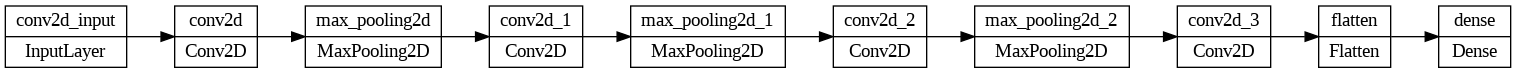

In [ ]:
plot_model(model_1, rankdir="LR")

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# callbacks is a reguralization technique to prevent over fitting
callbacks = [
    # to stop training when you measure that the validation loss is no longer improving
    EarlyStopping(patience=4, monitor='val_loss'),
    # reduce learning_rate if the model is not imporving
    ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001),
    # save best model
    ModelCheckpoint(filepath='./Models/model_1.keras', save_best_only=True, monitor='val_loss')
]


In [ ]:
# train the model
history_1 = model_1.fit(train_generator, validation_data=validation_generator, epochs=20, callbacks=[callbacks])

Epoch 1/20
598/598 [==============================] - 104s 152ms/step - loss: 0.6005 - accuracy: 0.6651 - val_loss: 0.5279 - val_accuracy: 0.7563 - lr: 0.0010
Epoch 2/20
598/598 [==============================] - 102s 170ms/step - loss: 0.4781 - accuracy: 0.7710 - val_loss: 0.4429 - val_accuracy: 0.7936 - lr: 0.0010
Epoch 3/20
598/598 [==============================] - 89s 149ms/step - loss: 0.3890 - accuracy: 0.8260 - val_loss: 0.4149 - val_accuracy: 0.8164 - lr: 0.0010
Epoch 4/20
598/598 [==============================] - 89s 148ms/step - loss: 0.3163 - accuracy: 0.8652 - val_loss: 0.3662 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 5/20
598/598 [==============================] - 87s 145ms/step - loss: 0.2544 - accuracy: 0.8920 - val_loss: 0.3254 - val_accuracy: 0.8656 - lr: 0.0010
Epoch 6/20
598/598 [==============================] - 89s 148ms/step - loss: 0.1913 - accuracy: 0.9217 - val_loss: 0.3775 - val_accuracy: 0.8513 - lr: 0.0010
Epoch 7/20
598/598 [==============================

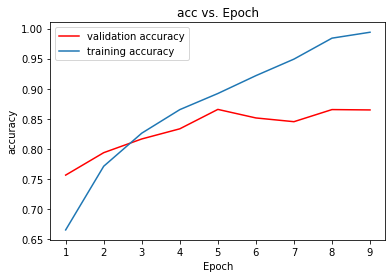

In [ ]:
plot_acc(history_1)

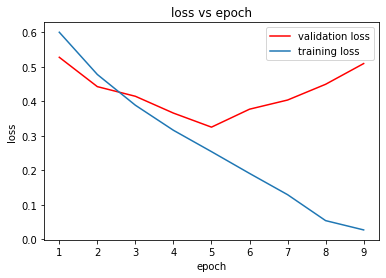

In [ ]:
plot_loss(history_1)

In [ ]:
model_1.evaluate(test_generator)

38/79 [=============>................] - ETA: 5s - loss: 0.4681 - accuracy: 0.8742

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


79/79 [==============================] - 10s 127ms/step - loss: 0.5179 - accuracy: 0.8717


[0.5179043412208557, 0.8716513514518738]

1/1 [==============================] - 0s 137ms/step


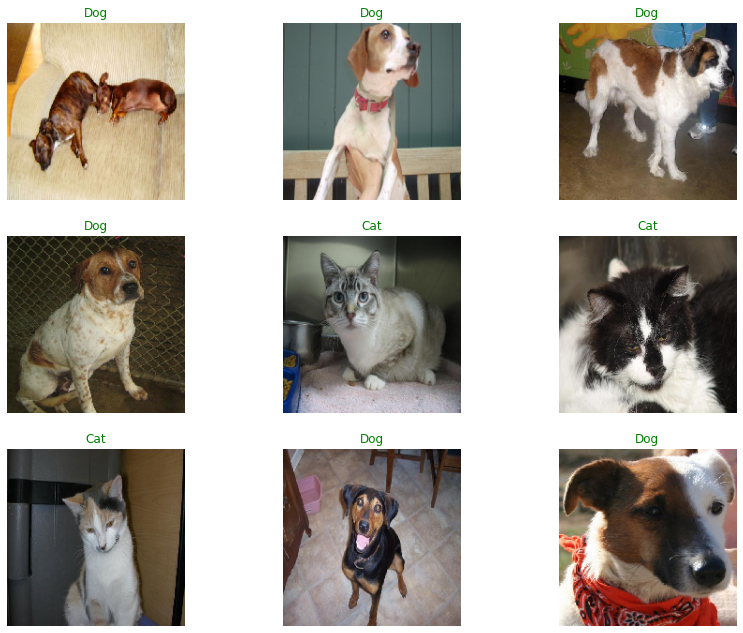

In [ ]:
plot_prediction(model_1,test_generator,10)

1/1 [==============================] - 0s 24ms/step


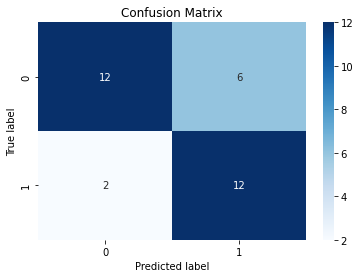

In [ ]:
images, labels = test_generator.next()

preds = model_1.predict(images)
prediction = round_custom(preds)

cm = confusion_matrix(labels,prediction)

# plot the confusion matrix as a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


#MODEL 2

In [ ]:
#define model with 3 conv. layers

def model_new_2():
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation= 'relu',input_shape = (190,190,3) ))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(64,(3,3),activation = 'relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(128,(3,3),activation = 'relu'))
  model.add(MaxPool2D(2,2))

  model.add(Flatten())

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss= 'binary_crossentropy',optimizer='adam' ,metrics = ['accuracy'])
  return model

In [ ]:
model_2 = model_new_2()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 188, 188, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 94, 94, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 92, 92, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 22, 22, 128)     

In [ ]:
# callbacks is a reguralization technique to prevent over fitting
callbacks = [
    # to stop training when you measure that the validation loss is no longer improving
    EarlyStopping(patience=4, monitor='val_loss'),
    # reduce learning_rate if the model is not imporving
    ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001),
    # save best model
    ModelCheckpoint(filepath='./Models/model_1.keras', save_best_only=True, monitor='val_loss')
]


In [ ]:
# train the model
history_2= model_2.fit(train_generator, validation_data=validation_generator, epochs=20, callbacks=[callbacks])

Epoch 1/20
598/598 [==============================] - 99s 163ms/step - loss: 0.5938 - accuracy: 0.6711 - val_loss: 0.5070 - val_accuracy: 0.7593 - lr: 0.0010
Epoch 2/20
598/598 [==============================] - 96s 161ms/step - loss: 0.4639 - accuracy: 0.7830 - val_loss: 0.4521 - val_accuracy: 0.7972 - lr: 0.0010
Epoch 3/20
598/598 [==============================] - 101s 168ms/step - loss: 0.4025 - accuracy: 0.8170 - val_loss: 0.4436 - val_accuracy: 0.8028 - lr: 0.0010
Epoch 4/20
598/598 [==============================] - 99s 165ms/step - loss: 0.3483 - accuracy: 0.8450 - val_loss: 0.4253 - val_accuracy: 0.8220 - lr: 0.0010
Epoch 5/20
598/598 [==============================] - 96s 161ms/step - loss: 0.2951 - accuracy: 0.8740 - val_loss: 0.4279 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 6/20
598/598 [==============================] - 88s 147ms/step - loss: 0.2474 - accuracy: 0.8965 - val_loss: 0.4314 - val_accuracy: 0.8312 - lr: 0.0010
Epoch 7/20
598/598 [==============================]

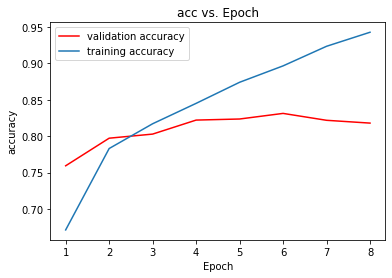

In [ ]:
plot_acc(history_2)

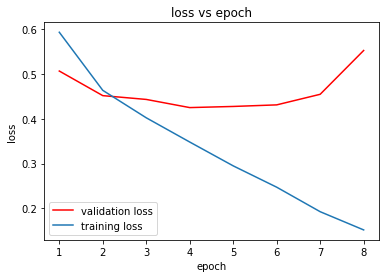

In [ ]:
plot_loss(history_2)

In [ ]:
model_2.evaluate(test_generator)

54/79 [===================>..........] - ETA: 3s - loss: 0.5000 - accuracy: 0.8333

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


79/79 [==============================] - 10s 120ms/step - loss: 0.5473 - accuracy: 0.8237


[0.5472725033760071, 0.823670506477356]

1/1 [==============================] - 0s 192ms/step
not normalized
[[ 8  3]
 [ 2 19]]


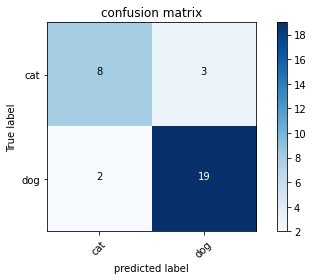

In [ ]:
classes = ['cat','dog']

image, labels = test_generator.next()

preds = model_2.predict(image)
prediction = round_custom(preds)

cm = confusion_matrix(labels,prediction)

plt_heatmap_confusion(cm,classes = classes,normalize= False)

#MODEL 3

In [ ]:
#add dropout 
def model_new_3():
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation= 'relu',input_shape = (190,190,3) ))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.1))

  model.add(Conv2D(64,(3,3),activation = 'relu'))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.1))

  model.add(Conv2D(128,(3,3),activation = 'relu'))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.1))

  model.add(Flatten())
  model.add(Dense(256, activation= 'relu'))
  model.add(Dropout(0.1))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss= 'binary_crossentropy',optimizer='adam' ,metrics = ['accuracy'])
  return model

In [ ]:
model_3= model_new_3()
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 188, 188, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 94, 94, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 94, 94, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 92, 92, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 46, 46, 64)       

In [ ]:
history_3 = model_3.fit(train_generator,validation_data= validation_generator, epochs= 20, callbacks = [callbacks])

Epoch 1/20
598/598 [==============================] - 92s 150ms/step - loss: 0.6551 - accuracy: 0.6284 - val_loss: 0.5925 - val_accuracy: 0.6695 - lr: 0.0010
Epoch 2/20
598/598 [==============================] - 92s 154ms/step - loss: 0.5178 - accuracy: 0.7436 - val_loss: 0.4882 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 3/20
598/598 [==============================] - 89s 150ms/step - loss: 0.4356 - accuracy: 0.7990 - val_loss: 0.4751 - val_accuracy: 0.7726 - lr: 0.0010
Epoch 4/20
598/598 [==============================] - 92s 155ms/step - loss: 0.3611 - accuracy: 0.8365 - val_loss: 0.5148 - val_accuracy: 0.7554 - lr: 0.0010
Epoch 5/20
598/598 [==============================] - 89s 150ms/step - loss: 0.2671 - accuracy: 0.8862 - val_loss: 0.5226 - val_accuracy: 0.7892 - lr: 0.0010
Epoch 6/20
598/598 [==============================] - 100s 167ms/step - loss: 0.1597 - accuracy: 0.9381 - val_loss: 0.6175 - val_accuracy: 0.7785 - lr: 0.0010
Epoch 7/20
598/598 [==============================]

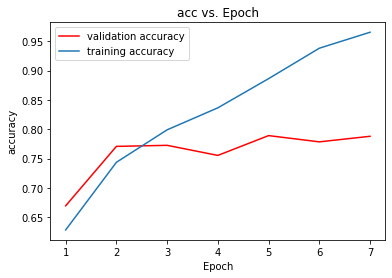

In [ ]:
plot_acc(history_3)

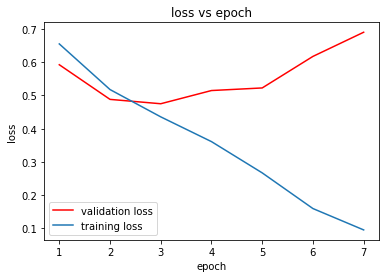

In [ ]:
plot_loss(history_3)

In [ ]:
model_3.evaluate(test_generator)

45/79 [================>.............] - ETA: 3s - loss: 0.6444 - accuracy: 0.8194

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


79/79 [==============================] - 9s 107ms/step - loss: 0.6453 - accuracy: 0.8197


[0.6452646255493164, 0.8196721076965332]

1/1 [==============================] - 0s 117ms/step
not normalized
[[ 6  3]
 [ 4 19]]


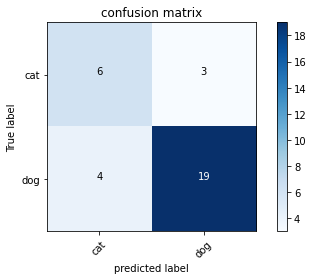

In [ ]:
classes = ['cat','dog']
image, labels = test_generator.next()

preds = model_3.predict(image)
prediction = round_custom(preds)

cm= confusion_matrix(labels, prediction)
plt_heatmap_confusion(cm,classes=classes, normalize= False)

#MODEL 4 

In [ ]:
#model for data augmentation

def model_aug():
  model = Sequential()

  model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (190,190,3)))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(128,(3,3),activation = 'relu'))
  model.add(MaxPool2D(2,2))

  model.add(Conv2D(265,(3,3),activation = 'relu'))
  model.add(GlobalAveragePooling2D())
  model.add(Dropout(0.1))

  model.add(Dense(1,activation = 'sigmoid'))

  model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
  return model

In [ ]:
model = model_aug()

In [ ]:
model_aug = model_aug()
model_aug.summary()

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-3,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=6,
        verbose=1)
]

# train the model
#batch_size = 32
#train_size = 20006
#test_size = 2501
history_4 = model_aug.fit(train_generator_aug,
                          validation_data=validation_generator_aug,
                          epochs=20,
                          callbacks = [callbacks]
                          )

In [ ]:
model_aug.evaluate(test_generator)

In [ ]:
plot_acc(history_4)

In [ ]:
plot_loss(history_4)

In [ ]:
labels

In [ ]:
classes = ['cat','dog']
image, labels = test_generator_aug.next()

preds = model_aug.predict(image)
prediction = round_custom(preds)

cm= confusion_matrix(labels, prediction)
plt_heatmap_confusion(cm,classes=classes, normalize= False)
preds = model.predict(image)


#GRID SEARCH 

In [ ]:

#define parametric model for GridSearch
def model_grid(dropout= 0.1,optimizer = 'adam', nbr_dense = 256):
  model= Sequential()

  model.add(Conv2D(32,(3,3), activation= 'relu',input_shape = (190,190,3) ))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(dropout))

  model.add(Conv2D(64,(3,3),activation = 'relu'))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(dropout))

  model.add(Conv2D(128,(3,3),activation = 'relu'))
  model.add(MaxPool2D(2,2))
  model.add(Dropout(dropout))

  model.add(Flatten())
  model.add(Dense(nbr_dense, activation= 'relu'))
  model.add(Dropout(dropout))

  model.add(Dense(1,activation='sigmoid'))

  model.compile(loss= 'binary_crossentropy',optimizer=optimizer ,metrics = ['accuracy'])
  return model


In [ ]:
X_train, y_train = train_generator_aug.next()
X_val, y_val = validation_generator_aug.next()
X_test, y_test = test_generator_aug.next()

In [ ]:

# create model
model = KerasClassifier(build_fn=model_grid,verbose=1)
# define the grid search parameters
param_grid = {
    'epochs': [10, 20 ],
    'nbr_dense': [ 256, 512],
    'optimizer':['RMSprop', 'Adam', 'Adamax'],
    'dropout': [ 0.2, 0.1, 0]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Print the best hyperparameters and validation accuracy
print("Best hyperparameters: ", grid_result.best_params_)
print("Validation accuracy: ", grid_result.best_score_)

# Train a final model with the best hyperparameters on the combined training and validation set
best_epochs = grid_result.best_params_['epochs']
best_nbr = grid_result.best_params_['nbr_dense']
best_optimizer = grid_result.best_params_['optimizer']
best_dropout = grid_result.best_params_['dropout']
final_model = model_grid(best_epochs,best_nbr,best_optimizer,best_dropout)
final_model.fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)), epochs=10, batch_size=32, verbose=0)

# Evaluate the final model on the test set
test_accuracy = accuracy_score(y_test, np.argmax(final_model.predict(X_test), axis=-1))
print("Test accuracy: ", test_accuracy)


In [ ]:

#plot mean test score against hyperparameters
import matplotlib.pyplot as plt

# Extract mean test scores and corresponding hyperparameters
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']

# Plot mean test scores versus hyperparameters
for mean, param in zip(means, params):
    plt.scatter(param['epochs'], mean)

# Add labels and title to the plot
plt.xlabel('Number of Epochs')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score versus Number of Epochs')

# Show the plot
plt.show()


#NESTED CROSS VALIDATION

In [ ]:
#make image generators to use in k-fold

train_datagen_df = ImageDataGenerator(rescale = 1.0/255.,
                                      zoom_range=0.2,
                                      rotation_range=0.2,
                                      shear_range=0.2,
                                      brightness_range=(0.7, 1),
                                      horizontal_flip=True,
                                      fill_mode='nearest',
                                      width_shift_range=0.1, 
                                      height_shift_range=0.1,
                                      validation_split = 0.1)

validation_datagen_df = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold

# Define the CNN model
model = model_aug()


# Define the number of outer and inner folds
outer_folds = 10
inner_folds = 5
callbacks = [EarlyStopping(patience=2, monitor='val_loss'),ReduceLROnPlateau(monitor='accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)]
# Define the outer cross-validation splits
outer_kfold = KFold(n_splits=outer_folds, shuffle=True, random_state=42)

# Initialize a list to store the performance estimates
performance_scores = []

# Loop over the outer folds
for train_index, val_index in outer_kfold.split(df):
    # Get the training and validation data for the outer fold
    data = df.iloc[train_index]
    test= df.iloc[val_index]
    test_generator = validation_datagen_df.flow_from_dataframe(test,
                                                               tot_dir,
                                                               x_col='filename',
                                                               y_col='category',
                                                               target_size=(190,190),
                                                               class_mode ='binary',
                                                               batch_size =32)
    X_test,y_test = test_generator.next()
    # Define the inner cross-validation splits
    inner_kfold = KFold(n_splits=inner_folds, shuffle=True, random_state=42)
    
    # Initialize a list to store the inner performance estimates
    inner_scores = []
    
    # Loop over the inner folds
    for inner_train_index, inner_val_index in inner_kfold.split(data):
        # Get the training and validation data for the inner fold
        train = data.iloc[inner_train_index]
        validation = data.iloc[inner_val_index]
        #process data to have augmented train set
        train_generator= train_datagen_df.flow_from_dataframe(train,
                                                              tot_dir,
                                                              x_col='filename',
                                                              y_col='category',
                                                              target_size =(190,190),
                                                              class_mode='binary',
                                                              batch_size = 32)
        validation_generator = validation_datagen_df.flow_from_dataframe(validation,
                                                                        tot_dir,
                                                                        x_col='filename',
                                                                        y_col ='category',
                                                                        target_size = (190,190),
                                                                        class_mode = 'binary',
                                                                        batch_size=32)
        # fit the model to the training data
        X_val, y_val = validation_generator.next()
        X_train, y_train = train_generator.next()
        history = model.fit(X_train,y_train,epochs=5,callbacks=callbacks)
        
        # Evaluate the model on the inner validation data
        loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
        
        # Store the inner performance score
        inner_scores.append(accuracy)
        
    # Average the inner performance scores to get an estimate of the model's performance on
    # the outer training data
    avg_inner_score = np.mean(inner_scores)
    
    # Evaluate the model on the outer test data
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    # Store the outer performance score
    performance_scores.append(accuracy)

# Average the outer performance scores to get an estimate of the model's overall performance
avg_performance_score = np.mean(performance_scores)

#CROSS VALIDATION

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, zero_one_loss


# set up cross validation
k = 5
kfold = KFold(n_splits=k, shuffle=True)

# arrays to store results
accuracies = np.zeros(k)
zeroonelosses = np.zeros(k)
val_loss = np.zeros(k)
val_acc = np.zeros(k)
#define callbacks and model
callbacks = [EarlyStopping(patience=2, monitor='val_loss'),ReduceLROnPlateau(monitor='accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)]

# loop over folds
for fold, (train_indices, val_indices) in enumerate(kfold.split(df)):
    # split data into training and validation sets
    train_data = df.iloc[train_indices]
    validation_data = df.iloc[val_indices]

    #process data to have augmented train set
    train_generator= train_datagen_df.flow_from_dataframe(train_data,
                                                          tot_dir,
                                                          x_col='filename',
                                                          y_col='category',
                                                          target_size =(190,190),
                                                          class_mode='binary',
                                                          batch_size = 32)
    validation_generator = validation_datagen_df.flow_from_dataframe(validation_data,
                                                                    tot_dir,
                                                                    x_col='filename',
                                                                    y_col ='category',
                                                                    target_size = (190,190),
                                                                    class_mode = 'binary',
                                                                    batch_size=32)
    # fit the model to the training data
    
    X_train, y_train = train_generator.next()
    history = model.fit(X_train,y_train,epochs=20,callbacks=callbacks)

    # make predictions on the validation set
    X_val , y_val = validation_generator.next()
    y_pred = model.predict(X_val)
    y_pred = np.round(y_pred).astype(int)

    # calculate accuracy and zero-one loss
    accuracy = accuracy_score(y_val, y_pred)
    zerooneloss = zero_one_loss(y_val, y_pred)

    # evaluate model on the validation set
    loss, acc = model.evaluate(X_val, y_val)

    # store results
    accuracies[fold] = accuracy
    zeroonelosses[fold] = zerooneloss
    val_loss[fold] = loss
    val_acc[fold] = acc

# average results across folds
avg_accuracy = np.mean(accuracies)
avg_zerooneloss = np.mean(zeroonelosses)
avg_val_loss = np.mean(val_loss)
avg_val_acc = np.mean(val_acc)

print("Average accuracy (calculated manually): {:.3f}".format(avg_accuracy))
print("Average zero-one loss (calculated manually): {:.3f}".format(avg_zerooneloss))
print("Average validation loss (calculated using model.evaluate): {:.3f}".format(avg_val_loss))
print("Average validation accuracy (calculated using model.evaluate): {:.3f}".format(avg_val_acc))


#TRANSFER LEARNING INCEPTIONV3

In [ ]:
#Load Model
inception = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False,input_shape=(190,190,3))

for layer in inception.layers[:-10]:
    layer.trainable = False # Freeze weights of all layers till except the last 10

last_layer = inception.get_layer('mixed7')

print('last layer output shape: ', last_layer.output_shape)

layer_output = last_layer.output

#define model
x = Flatten()(layer_output)
x = BatchNormalization()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inception.input, predictions)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

In [ ]:
def scheduler(epoch, lr):
    
    if epoch < 20:
        return lr
    else:
        return lr * tf.math.exp(-0.2)
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 10,callbacks=[callback])

In [ ]:
plot_acc(history)

In [ ]:
plot_loss(history)

#TRANSFER LEARNING VGG-16

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

base_model = VGG16(weights='imagenet' , include_top = False ,input_shape=(190,190,3))

#freeze the weights
for layer in base_model.layers:
    layer.trainable = False

last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output
x = keras.layers.Flatten()(last_output)
x = keras.layers.Dense(64, activation='relu', name='FC_1')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(2, activation='sigmoid', name='sigmoid')(x)

VGG16_model = keras.Model(inputs = base_model.input, outputs = x)

VGG16_model.compile(optimizer=keras.optimizers.Adam(),loss = 'binary_crossentropy', metrics=["accuracy"])

VGG16_model.fit(train_generator_aug, validation_data = validation_generator_aug,epochs = 10 )

In [ ]:

# Load the VGG-16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False)

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a dense layer for binary classification
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy')

# Train the top layers
model.fit(X_train, y_train, epochs=1a0, validation_data = [X_test,y_test])


#TRAIN FINAL MODEL ON ALL DATA 

In [ ]:
#MODEL 4 is the model that performs best using Augmented Data
history_f = model_aug.fit(all_generator_aug, epochs = 10)



In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (190,190, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

 image = load('')
 history_f.predict(image)